<a href="https://colab.research.google.com/github/schauppi/Tensorflow/blob/main/CV_Devs_at_Umdasch/Computer_Vision_Developers_at_Umdasch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Computer Vision HandsOn: Bilklassifizierung + Objekterkennung

Developers@Umdasch MeetUp, 14.10.2021

David Schaupp, 2021


## Framework


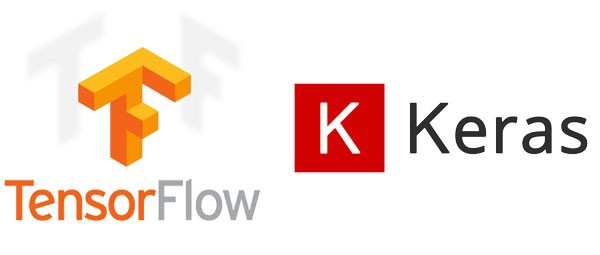

## Praxisbeispiel 1: Bildklassifizierung mit VGG16

Das VGG16 Netzwerk muss nicht neu trainiert werden, sondern es steht zur freien Benutzung zur Bildklassifizierung bereit. 
Eine Implementierung gibts es in der Keras API - https://keras.io/api/applications/vgg/

Originalpaper: https://arxiv.org/abs/1409.1556

### Architektur VGG16

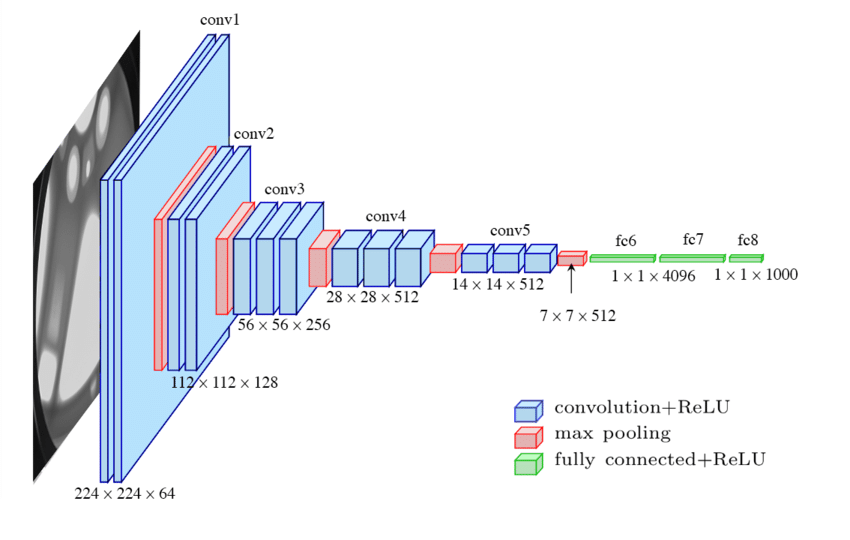

In [ ]:
#Imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

### Laden des Models

In [ ]:
#Model laden - fertig.... Model ist Einsatzbereit
from keras.applications.vgg16 import VGG16
model = VGG16()

In [ ]:
#Haben wir das richtige Model - stimmt die Architektur?
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Einschub - VGG16 selber "programmieren" mit TensorFlow Keras

# input

input = Input(shape =(224,224,3))
# 1st Conv Block<br>

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)<br>
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)<br>
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)<br>
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)<br>
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)<br>

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)<br>
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)<br>
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)<br>
x = Dense(units = 4096, activation ='relu')(x)<br>
output = Dense(units = 1000, activation ='softmax')(x)<br>
# creating the model

model = Model (inputs=input, outputs =output)<br>
model.summary()

### Laden eines Bildes

Damit das Bild in unserem Google Drive zu Verfügung steht.

In [ ]:
!wget https://github.com/schauppi/Tensorflow/raw/main/CV_Devs_at_Umdasch/doggo.jpeg

### Visualisierung des Bildes

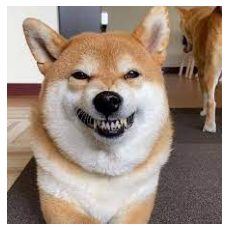

In [ ]:
image_file = "/content/doggo.jpeg"
%matplotlib inline
test_image = cv2.imread(image_file)
doggo = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(doggo)
plt.show()

### Vorbereiten des Bildes

Das Bild muss dem Netzwerk in einer bestimmten Dimension übergeben werden - im Fall von VGG16 224x224 Pixel.
Danach muss das Bild in eine Matrize - ein Array umgewandelt werden (Neuronale Netze verarbeiten Zahlen und keine "Bilder").

In [ ]:
#Bild in die richtige Dimension bringen
from keras.preprocessing.image import load_img
image_doggo = load_img("/content/doggo.jpeg", target_size=(224, 224))

In [ ]:
#Bild in eine Matrize/Array konvertieren
from keras.preprocessing.image import img_to_array
image_doggo = img_to_array(image_doggo)

In [ ]:
#Matrize des Bildes - mit solch einer Form kann das Netz arbeiten
image_doggo

array([[[233., 233., 231.],
        [233., 233., 231.],
        [232., 232., 230.],
        ...,
        [ 65.,  22.,   5.],
        [107.,  62.,  39.],
        [134.,  86.,  63.]],

       [[233., 233., 231.],
        [233., 233., 231.],
        [233., 233., 231.],
        ...,
        [ 60.,  19.,   1.],
        [101.,  56.,  35.],
        [128.,  82.,  58.]],

       [[233., 233., 231.],
        [233., 233., 231.],
        [233., 233., 231.],
        ...,
        [ 57.,  16.,   0.],
        [ 89.,  47.,  25.],
        [115.,  70.,  47.]],

       ...,

       [[ 62.,  52.,  53.],
        [ 87.,  77.,  78.],
        [ 93.,  83.,  84.],
        ...,
        [107.,  95.,  97.],
        [ 77.,  65.,  67.],
        [ 97.,  85.,  87.]],

       [[ 87.,  77.,  78.],
        [ 96.,  86.,  87.],
        [ 89.,  79.,  80.],
        ...,
        [ 80.,  68.,  70.],
        [ 69.,  57.,  59.],
        [ 93.,  81.,  83.]],

       [[ 87.,  77.,  78.],
        [ 96.,  86.,  87.],
        [ 89.,  

In [ ]:
#Quercheck - stimmt die größe des Bildes?
image_doggo.shape

(224, 224, 3)

In [ ]:
#VGG16 benötigt eine Extradimension - ist "Trainingsbedingt"
image_doggo = image_doggo.reshape((1, image_doggo.shape[0], image_doggo.shape[1], image_doggo.shape[2]))

In [ ]:
#Quercheck2 - stimmt die größe des Bildes endlich?
image_doggo.shape

(1, 224, 224, 3)

In [ ]:
#RGB zu BGR Channel tauschen - muss gemacht werden sonst kann das Bild dem Netzwerk nicht übergeben werden.
from keras.applications.vgg16 import preprocess_input
image_doggo = preprocess_input(image_doggo)

### Bild klassifizieren

In [ ]:
#Mit diesem Aufruf klassifiziert das VGG16 Netzwerk das Eingabebild
yhat = model.predict(image_doggo)

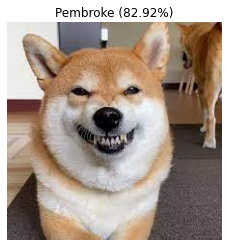

In [ ]:
#Den Output der Bildklassifikation "entschlüsseln"
from keras.applications.vgg16 import decode_predictions
label = decode_predictions(yhat)
label = label[0][0]
#print('%s (%.2f%%)' % (label[1], label[2]*100))

plt.axis("off")
plt.imshow(doggo)
plt.title('%s (%.2f%%)' % (label[1], label[2]*100))
plt.show()

Pembroke ist eine Hunderasse (Welsh Corgi) - sieht ähnlich aus wie das Eingabebild. Das Netz definiert das Bild nicht nur als Hund sondern unterscheidet auch die Hunderasse.

Wikipedia Link: https://de.wikipedia.org/wiki/Welsh_Corgi_Cardigan

Alle trainierten Labels/Klassen findet ihr hier: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

## Praxisbeispiel 2: Objekterkennung mit EfficientNet

Dieses Netzwerk muss ebenfalls nicht neu trainiert werden, sondern kann gleich "out of the box" verwendet werden. 

### Architektur EfficientNet-B7


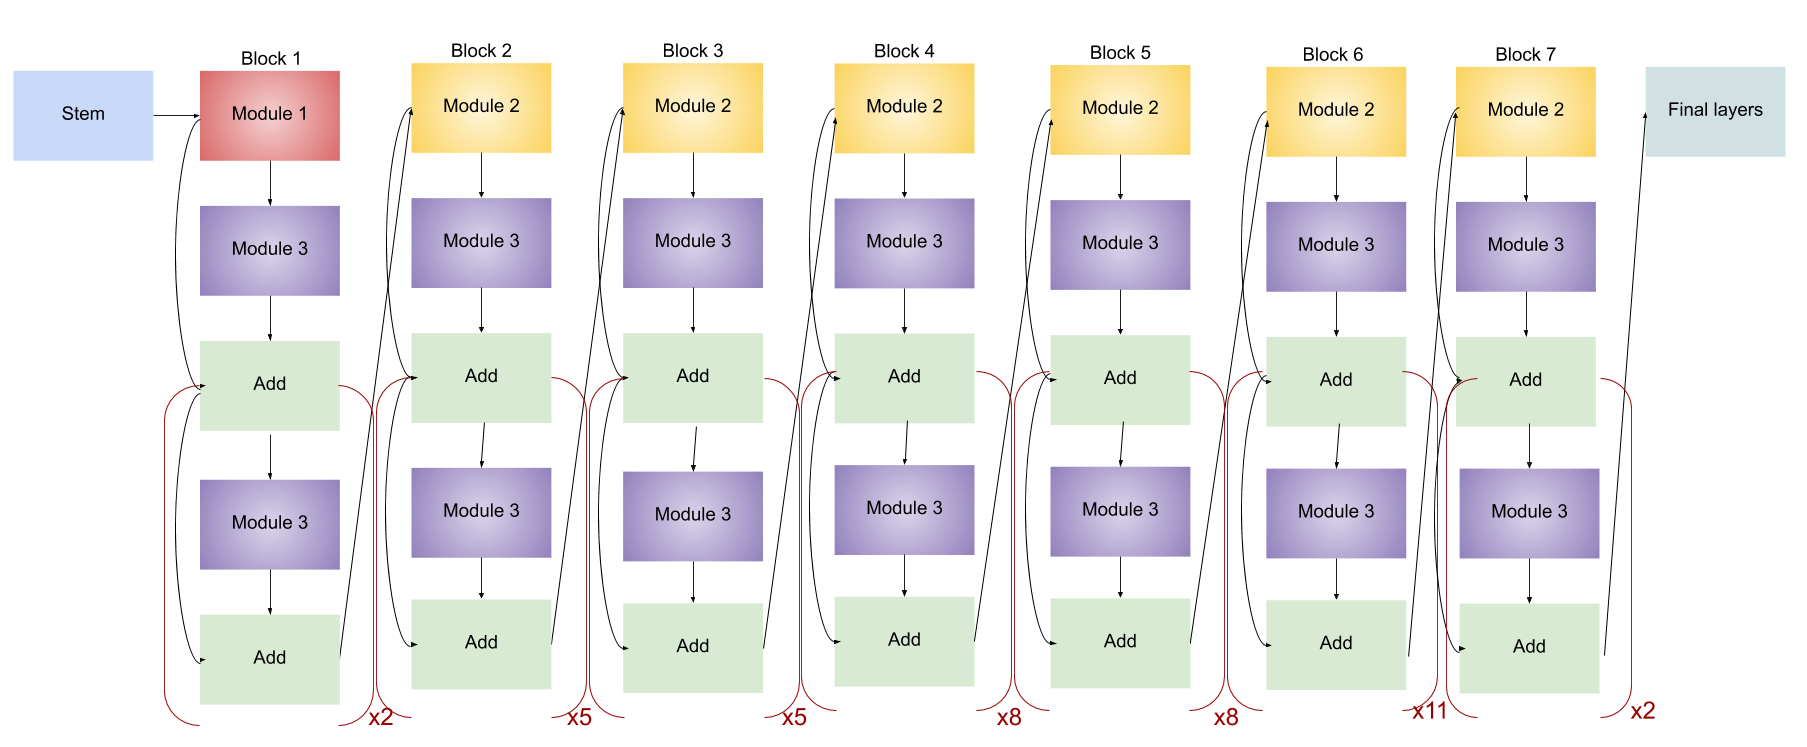

Originalpaper: https://arxiv.org/abs/1905.11946

Das EfficientNet Model laden wir aus TensorFlow Hub - Link: https://tfhub.dev/

Jeder Entwickler kann seine entwickelten und trainierten Modelle KOSTENLOS zu Verfügung stellen. 
Dabei gibts es Modelle für
*   NLP - Natural Language Processing
*   CV - Computer Vision
*   Seq - Sequence Modelling (Zeitreihen)



In [ ]:
#Download von Hilfsfunktionen zur Visualisierung der erkennten Objekte
!wget https://raw.githubusercontent.com/schauppi/Tensorflow/main/CV_Devs_at_Umdasch/visualization_utils.py

In [ ]:
#Download der trainierten Klassen/Labels (Coco - Dataset, LINK: https://cocodataset.org/#home)
!wget https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt

In [ ]:
#Speichern der Klassen in einer Liste
with open("/content/coco-labels-2014_2017.txt", "r") as file:
    labels=file.read().splitlines()

In [ ]:
#Imports
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from visualization_utils import draw_bounding_box_on_image, draw_bounding_box_on_image_array

###Laden des Bildes

In [ ]:
!wget https://github.com/schauppi/Tensorflow/raw/main/CV_Devs_at_Umdasch/corgis.jpeg

### Laden des Models

In [ ]:
efficient_net_d7 = hub.load("https://tfhub.dev/tensorflow/efficientdet/d7/1")

###Laden eines Bildes

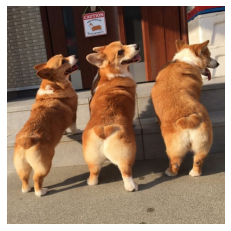

In [ ]:
image_file = "/content/corgis.jpeg"
%matplotlib inline
test_image = cv2.imread(image_file)
corgis = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(corgis)
plt.show()

### Vorbereiten des Bildes

In [ ]:
#Bild in eine Matrize konvertieren
image_tensor = tf.constant(test_image, dtype=tf.uint8)

In [ ]:
#Quercheck - Größe des Bildes (Beim Efficientnet ist die Dimension des Bildes nicht wichtig)
image_tensor.shape

TensorShape([700, 700, 3])

In [ ]:
#EfficientNet benötigt wie das VGG16 eine Extradimension - ist "Trainingsbedingt"
image_tensor = tf.expand_dims(image_tensor, axis=0)
print(image_tensor.shape)

(1, 700, 700, 3)


###Objekte im Bild erkennen

In [ ]:
y_hat = efficient_net_d7(image_tensor)

In [ ]:
#Wie bei dem VGG16 muss die Ausgabe vereinfacht werden
detection_boxes_d7 = y_hat["detection_boxes"][0]
detection_scores_d7 = y_hat["detection_scores"][0]
detection_classes_d7 = y_hat["detection_classes"][0]

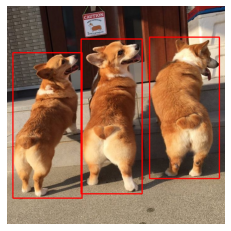

In [ ]:
#Visualisierung der erkannten Objekte
boxes = detection_boxes_d7[(detection_scores_d7 > 0.6)]
for i in range(len(boxes)):
    ymin, xmin, ymax, xmax = boxes[i]
    #convert tensor scalar to integer
    ymin = ymin.numpy()
    xmin = xmin.numpy()
    ymax = ymax.numpy()
    xmax = xmax.numpy()
    draw_bounding_box_on_image_array(corgis, ymin, xmin, ymax, xmax, use_normalized_coordinates=True)
plt.axis("off")
plt.imshow(corgis)
plt.show()